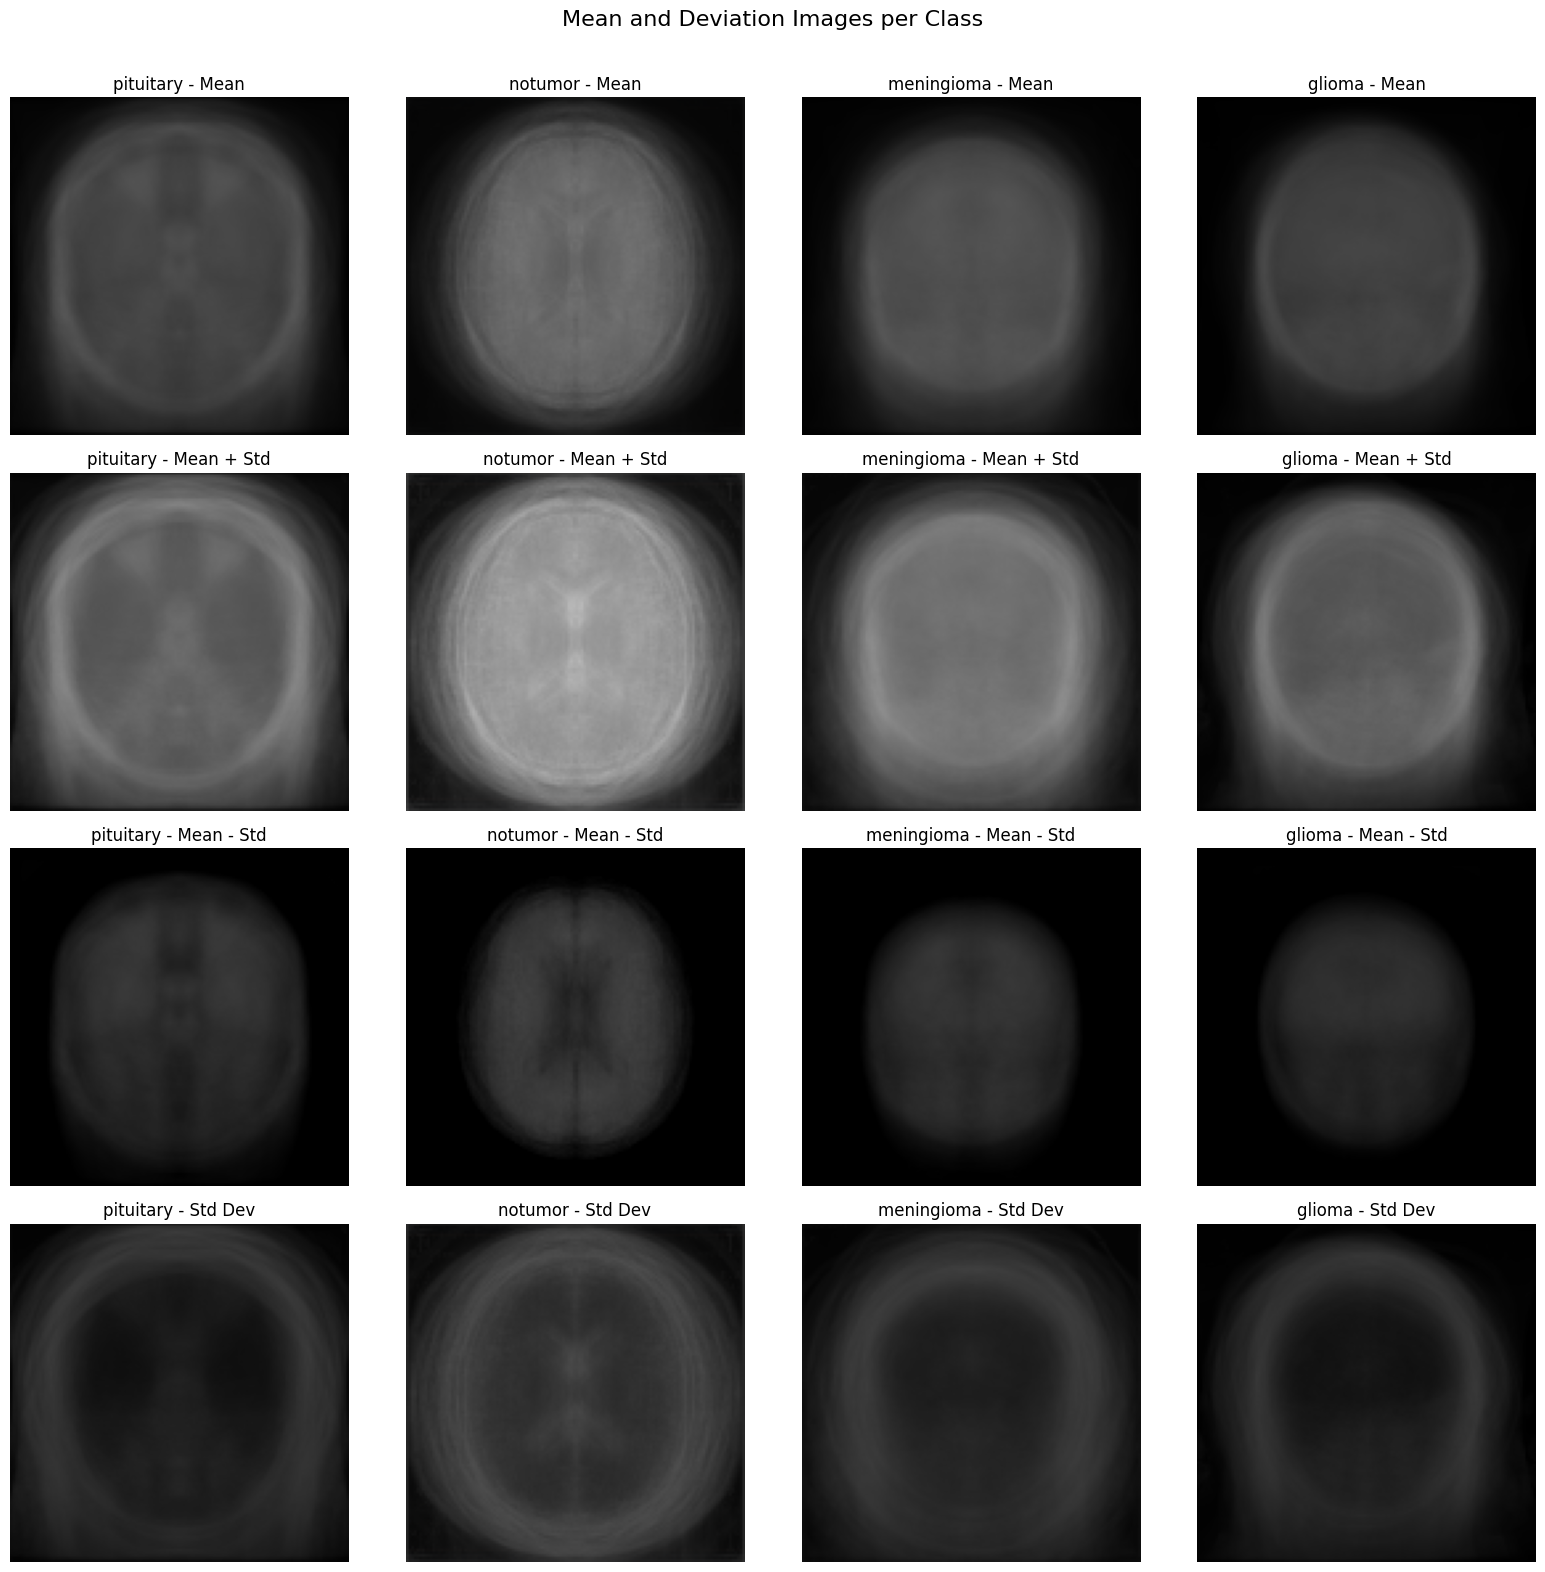

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Set image dimensions
IMG_SIZE = (128, 128)

# Prepare subfolder paths
classes = os.listdir(data_path)

# Set up plotting
fig, axs = plt.subplots(len(classes), 4, figsize=(16, 4 * len(classes)))
fig.suptitle('Mean and Deviation Images per Class', fontsize=16)

# Function to compute mean and std images
def compute_mean_std(image_list):
    images = np.stack(image_list, axis=0)
    mean_image = np.mean(images, axis=0)
    std_image = np.std(images, axis=0)
    return mean_image, std_image

# Loop over each class
for i, class_name in enumerate(classes):
    class_path = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    images = []
    for img_file in image_files:
        img = cv2.imread(os.path.join(class_path, img_file))
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img / 255.0)  # Normalize to [0,1]
    
    if len(images) == 0:
        continue

    # Compute mean and std
    mean_img, std_img = compute_mean_std(images)
    
    # Compute mean ± std
    pos_dev = np.clip(mean_img + std_img, 0, 1)
    neg_dev = np.clip(mean_img - std_img, 0, 1)


    axs[0, i].imshow(mean_img)
    axs[0, i].set_title(f"{class_name} - Mean")
    
    axs[1, i].imshow(pos_dev)
    axs[1, i].set_title(f"{class_name} - Mean + Std")

    axs[2, i].imshow(neg_dev)
    axs[2, i].set_title(f"{class_name} - Mean - Std")

    axs[3, i].imshow(std_img)
    axs[3, i].set_title(f"{class_name} - Std Dev")

    for ax in axs[i]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


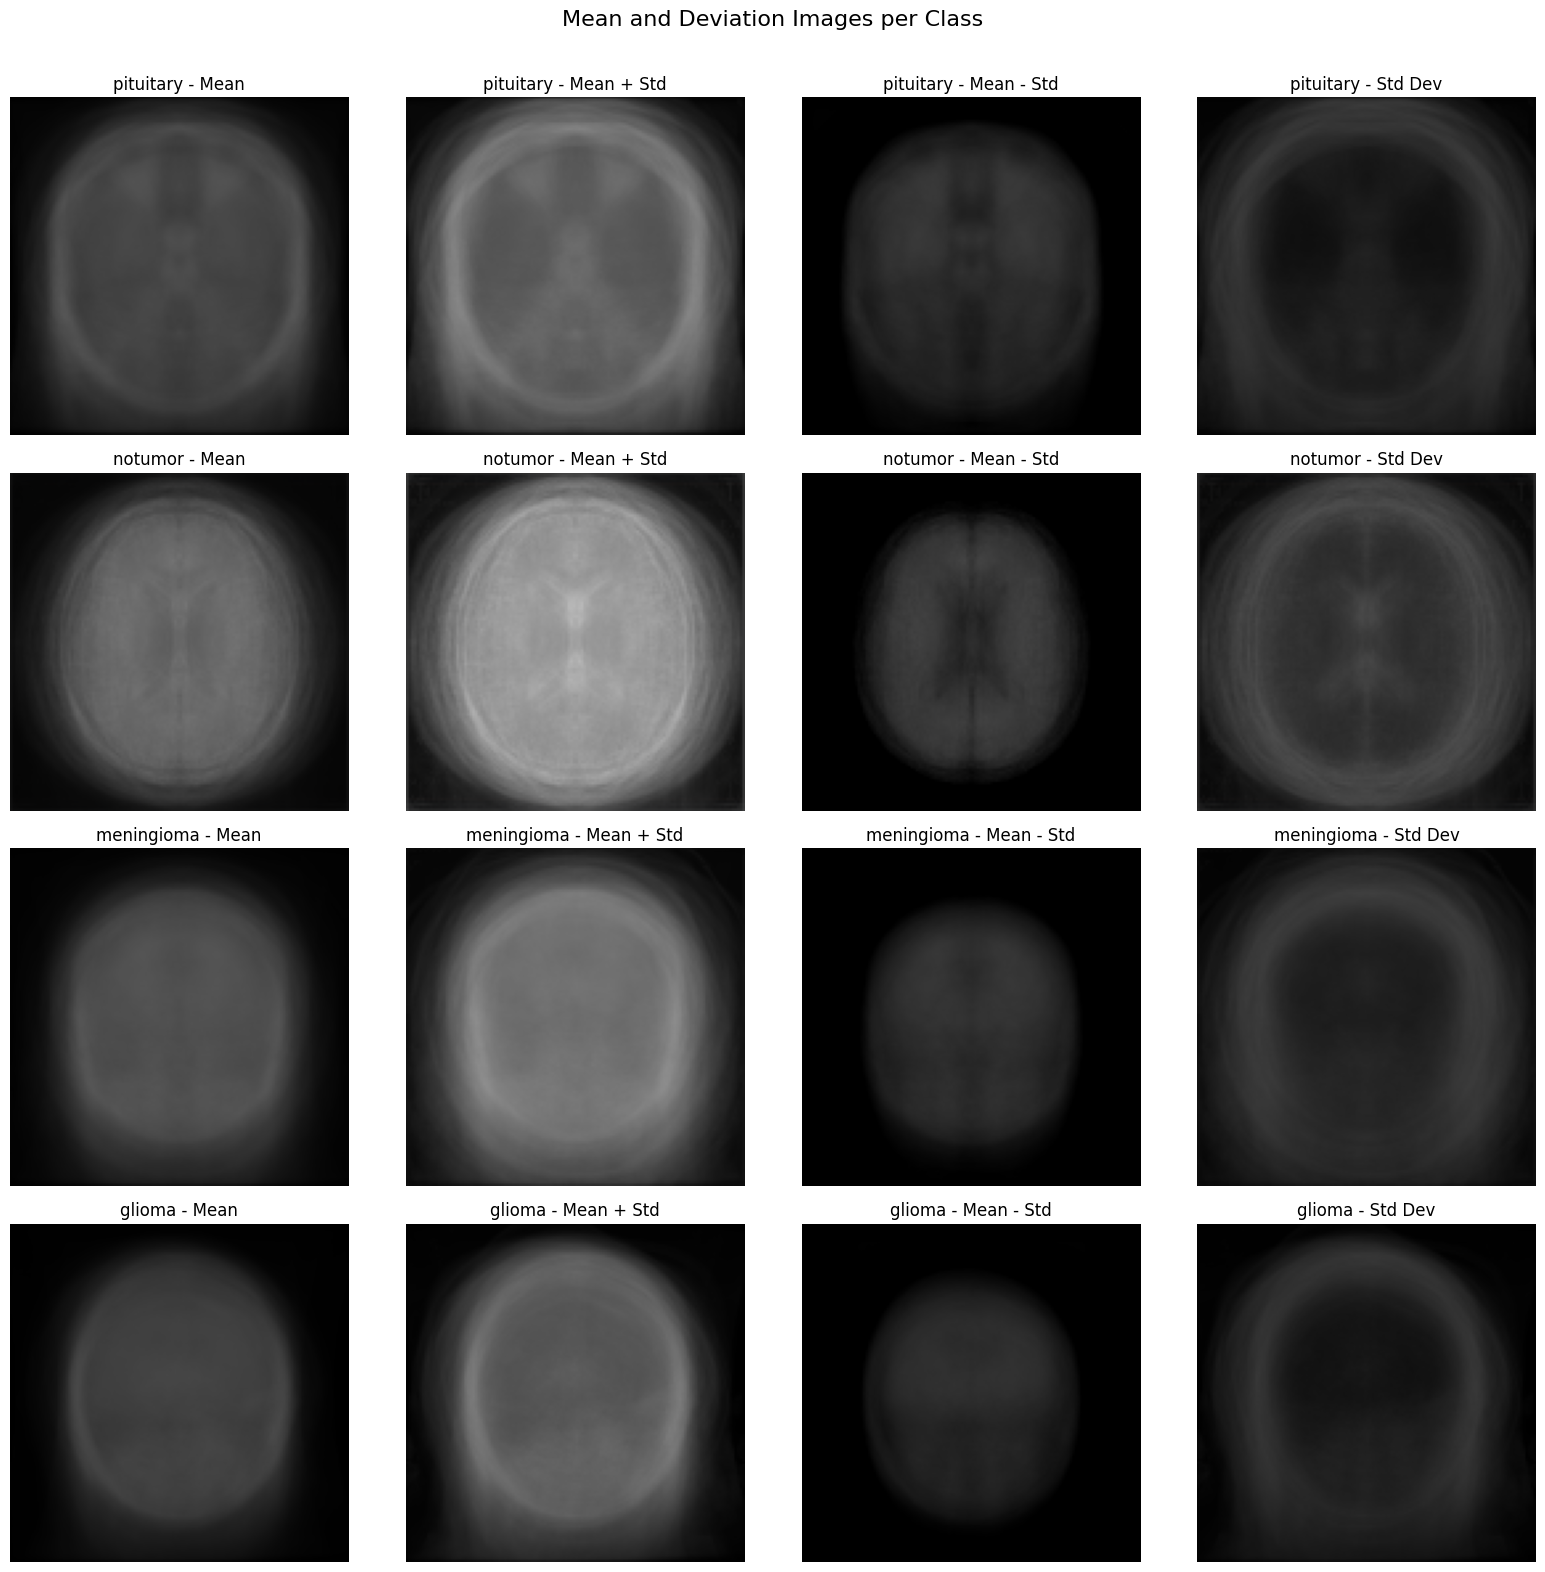

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Set image dimensions
IMG_SIZE = (128, 128)

# Prepare subfolder paths
classes = os.listdir(data_path)

# Set up plotting
fig, axs = plt.subplots(len(classes), 4, figsize=(16, 4 * len(classes)))
fig.suptitle('Mean and Deviation Images per Class', fontsize=16)

# Function to compute mean and std images
def compute_mean_std(image_list):
    images = np.stack(image_list, axis=0)
    mean_image = np.mean(images, axis=0)
    std_image = np.std(images, axis=0)
    return mean_image, std_image

# Loop over each class
for i, class_name in enumerate(classes):
    class_path = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    images = []
    for img_file in image_files:
        img = cv2.imread(os.path.join(class_path, img_file))
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img / 255.0)  # Normalize to [0,1]
    
    if len(images) == 0:
        continue

    # Compute mean and std
    mean_img, std_img = compute_mean_std(images)
    
    # Compute mean ± std
    pos_dev = np.clip(mean_img + std_img, 0, 1)
    neg_dev = np.clip(mean_img - std_img, 0, 1)

    # Plotting
    axs[i, 0].imshow(mean_img)
    axs[i, 0].set_title(f"{class_name} - Mean")
    axs[i, 1].imshow(pos_dev)
    axs[i, 1].set_title(f"{class_name} - Mean + Std")
    axs[i, 2].imshow(neg_dev)
    axs[i, 2].set_title(f"{class_name} - Mean - Std")
    axs[i, 3].imshow(std_img)
    axs[i, 3].set_title(f"{class_name} - Std Dev")



    for ax in axs[i]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Loading images: 100%|██████████| 5712/5712 [00:16<00:00, 353.63it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


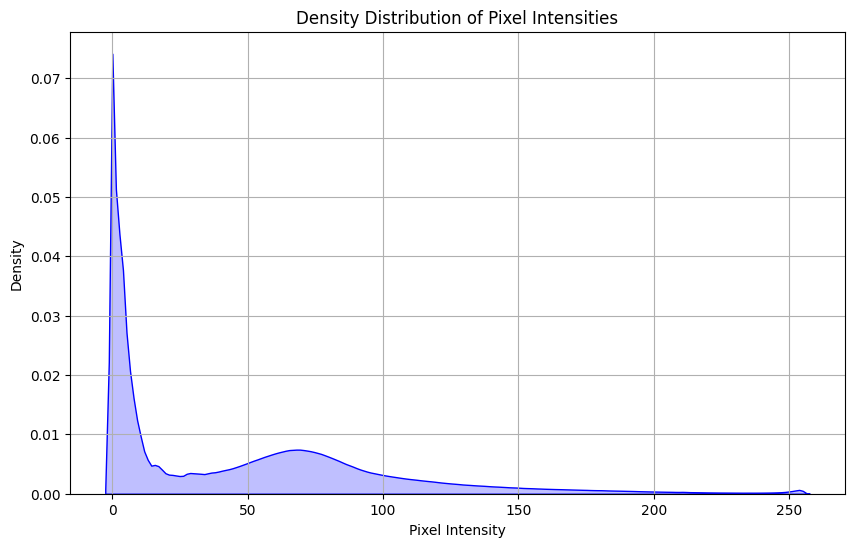

In [3]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

# Define the path to the dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Collect all image paths
image_paths = []
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(folder_path, img_file))

# Read and collect all pixel values
all_pixels = []

for img_path in tqdm(image_paths, desc='Loading images'):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Use IMREAD_COLOR for RGB
    if img is not None:
        img = cv2.resize(img, (64, 64))
        all_pixels.extend(img.flatten())

# Convert to NumPy array
all_pixels = np.array(all_pixels)

# Plot KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.kdeplot(all_pixels, bw_adjust=0.5, fill=True, color='blue')
plt.title('Density Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Processing glioma: 100%|██████████| 1321/1321 [00:04<00:00, 323.05it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

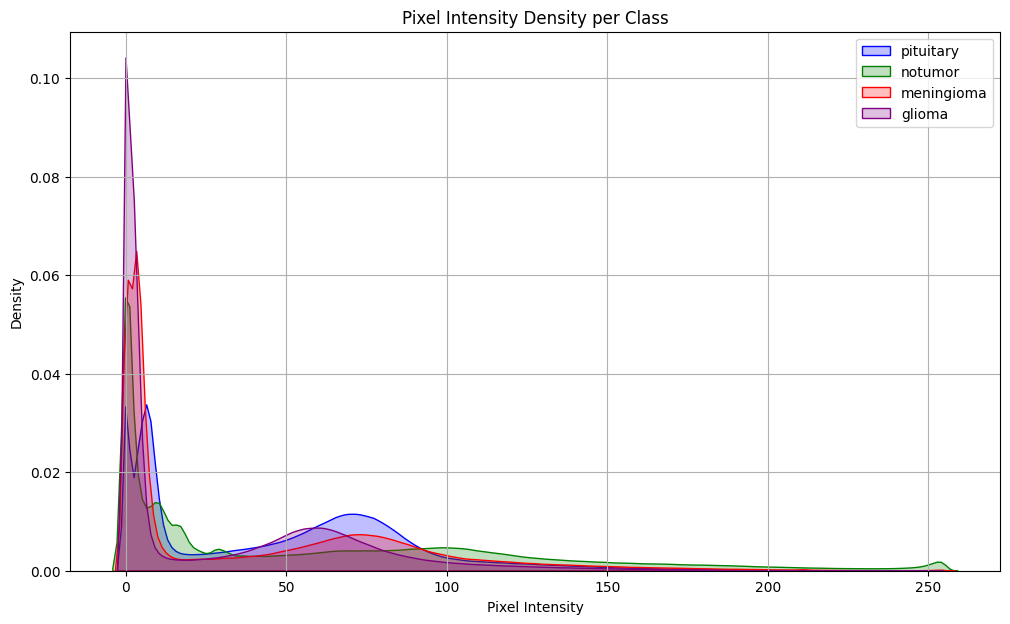

In [4]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Store pixel intensities per class
class_pixel_values = {}

# Read images and store pixel intensities by class
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_values = []
        for img_file in tqdm(os.listdir(folder_path), desc=f'Processing {folder}'):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    pixel_values.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_values)

# Plot KDE for each class
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'purple']
for i, (cls, pixels) in enumerate(class_pixel_values.items()):
    sns.kdeplot(pixels, bw_adjust=0.5, fill=True, label=cls, color=colors[i])

plt.title('Pixel Intensity Density per Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


Processing glioma: 100%|██████████| 1321/1321 [00:15<00:00, 82.95it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


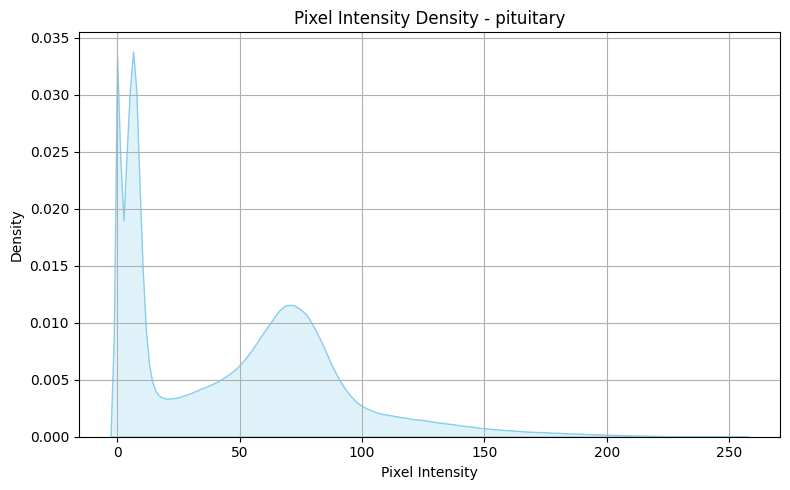

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


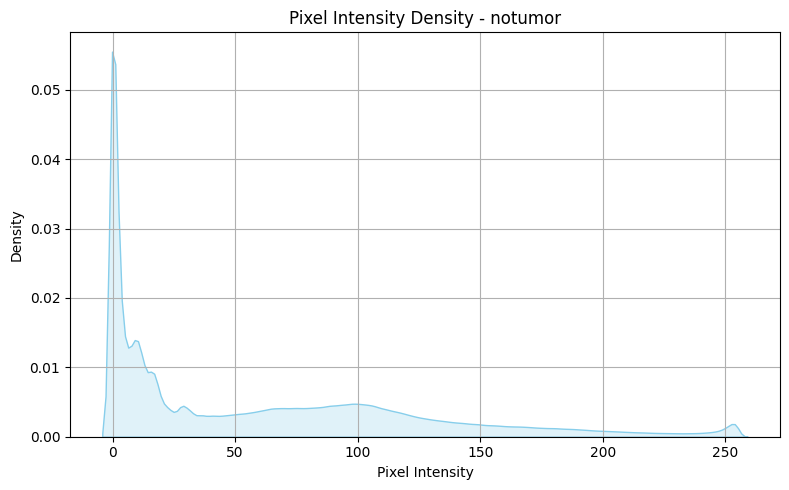

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


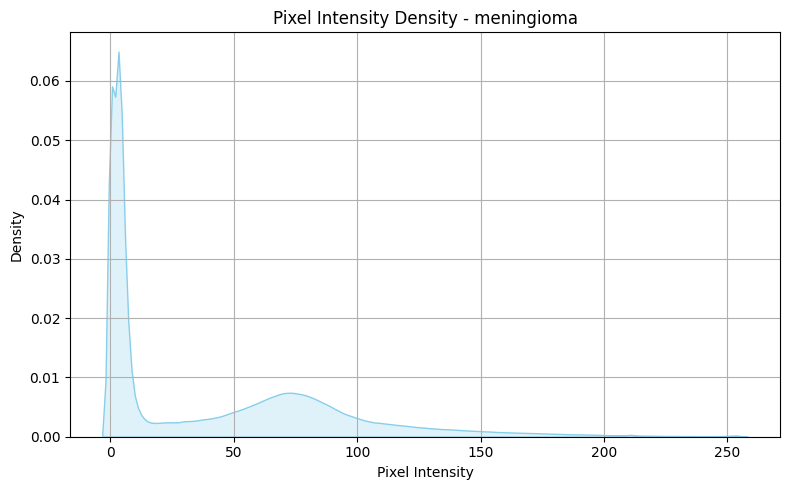

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


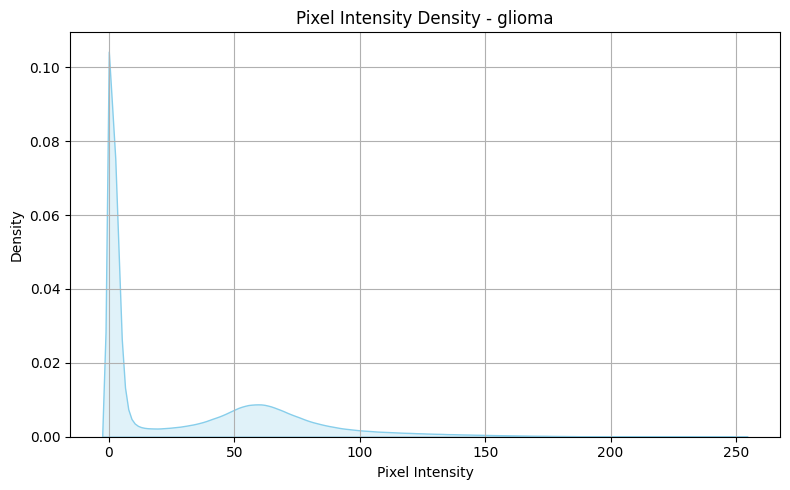

In [5]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Store pixel intensities per class
class_pixel_values = {}

# Read images and store pixel intensities by class
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_values = []
        for img_file in tqdm(os.listdir(folder_path), desc=f'Processing {folder}'):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    pixel_values.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_values)

# Plot separate KDE for each class
for cls, pixels in class_pixel_values.items():
    plt.figure(figsize=(8, 5))
    sns.kdeplot(pixels, bw_adjust=0.5, fill=True, color='skyblue')
    plt.title(f'Pixel Intensity Density - {cls}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Processing glioma: 100%|██████████| 1321/1321 [00:04<00:00, 296.70it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

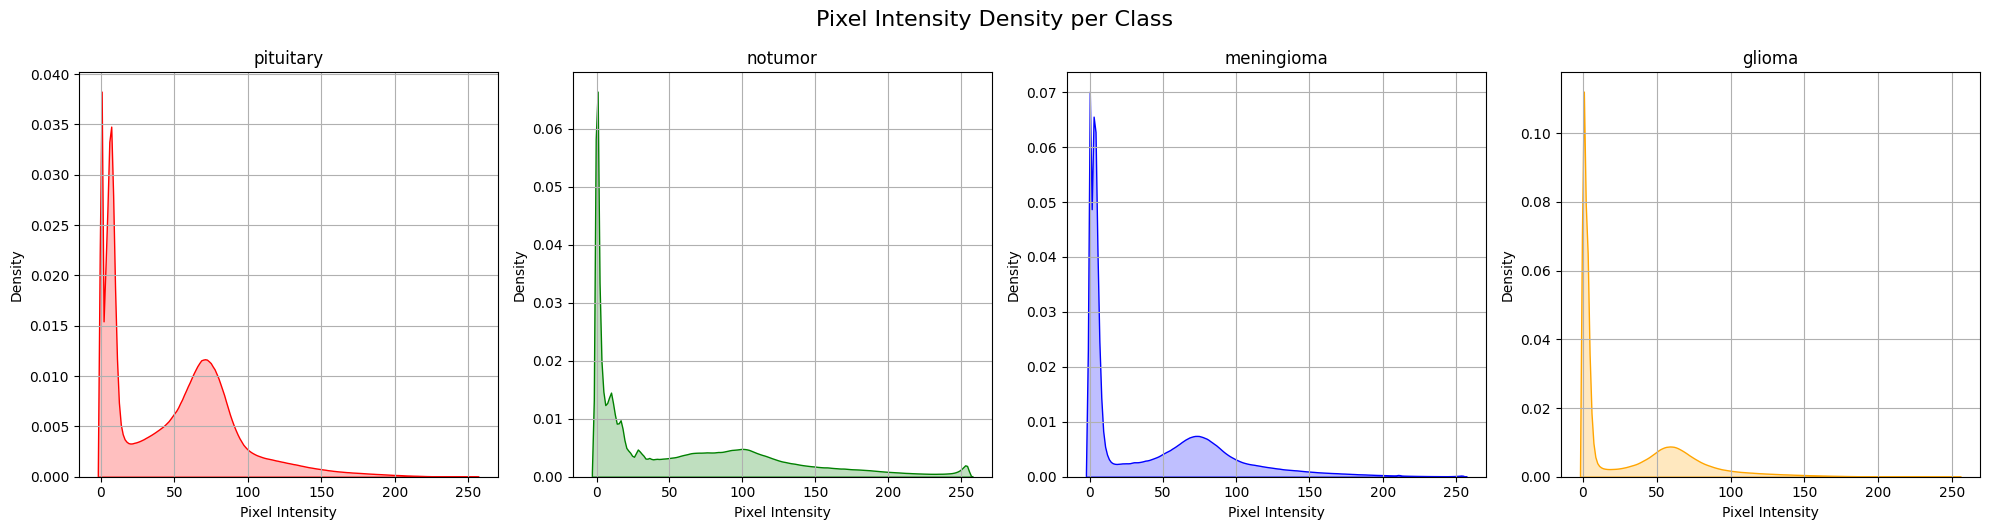

In [6]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Store pixel intensities per class
class_pixel_values = {}

# Read images and store pixel intensities by class
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_values = []
        for img_file in tqdm(os.listdir(folder_path), desc=f'Processing {folder}'):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (128, 128))
                    pixel_values.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_values)

# Plot KDEs in a single row (4 subplots)
colors = ['red', 'green', 'blue', 'orange']
class_names = list(class_pixel_values.keys())

plt.figure(figsize=(20, 5))
for i, cls in enumerate(class_names):
    plt.subplot(1, 4, i + 1)
    sns.kdeplot(class_pixel_values[cls], bw_adjust=0.5, fill=True, color=colors[i])
    plt.title(f'{cls}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()

plt.suptitle('Pixel Intensity Density per Class', fontsize=16, y=1.05)
plt.show()


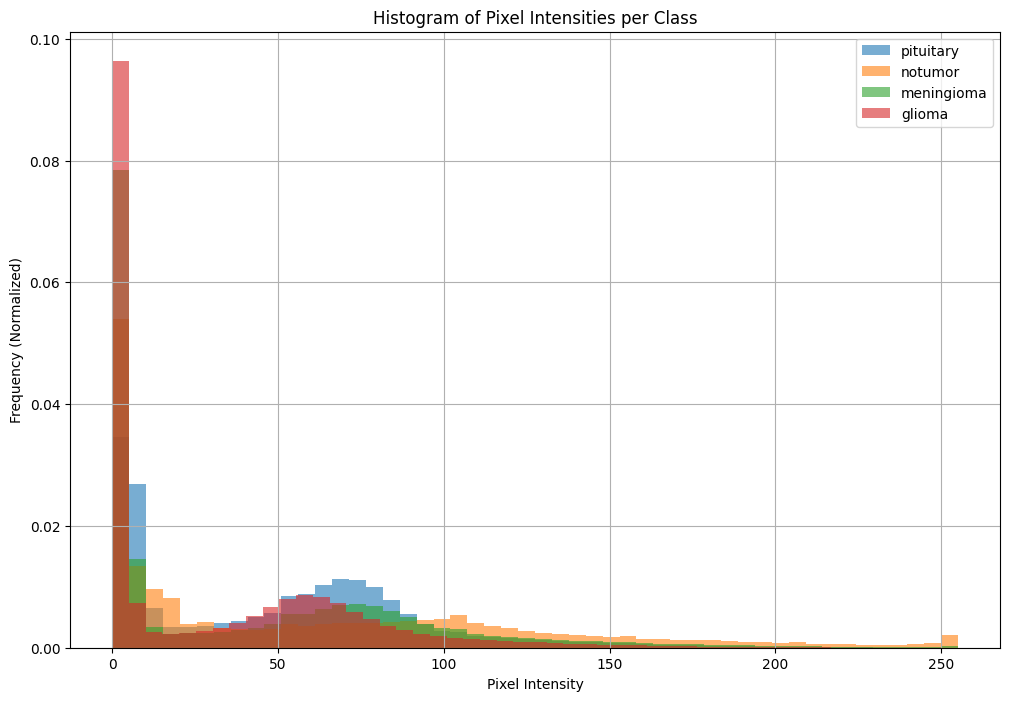

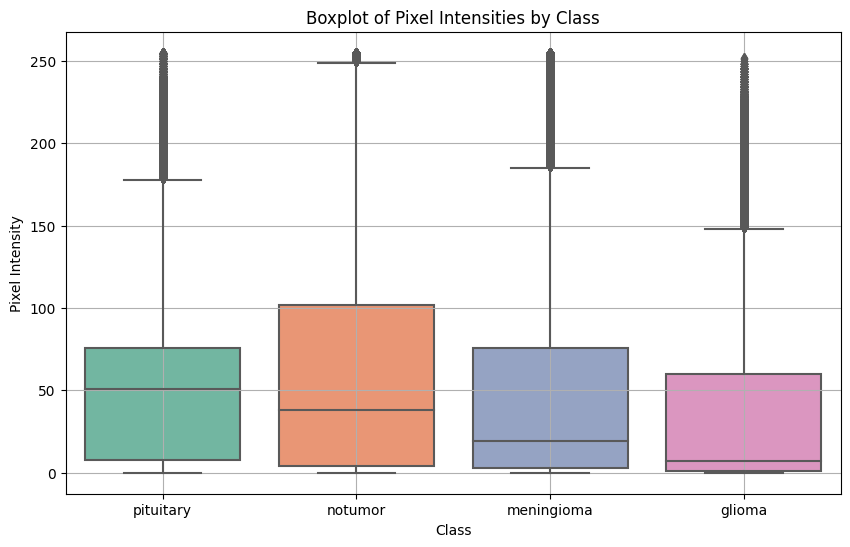

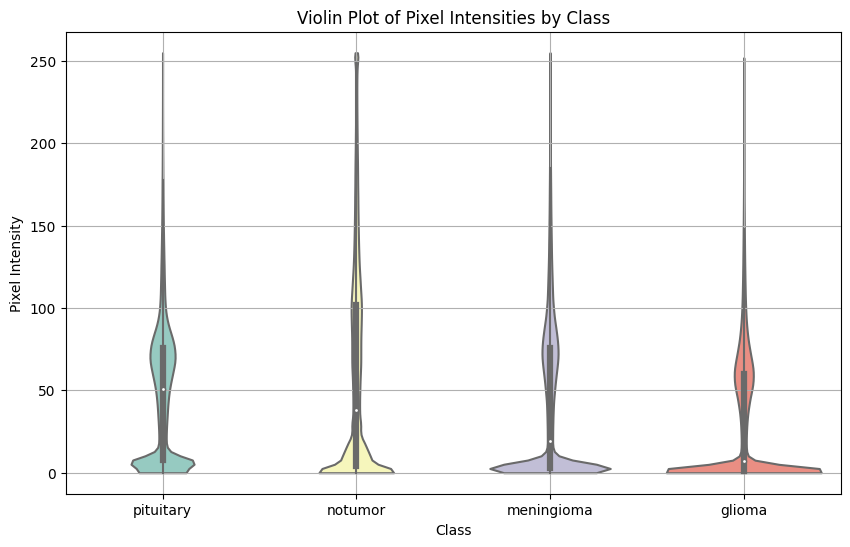

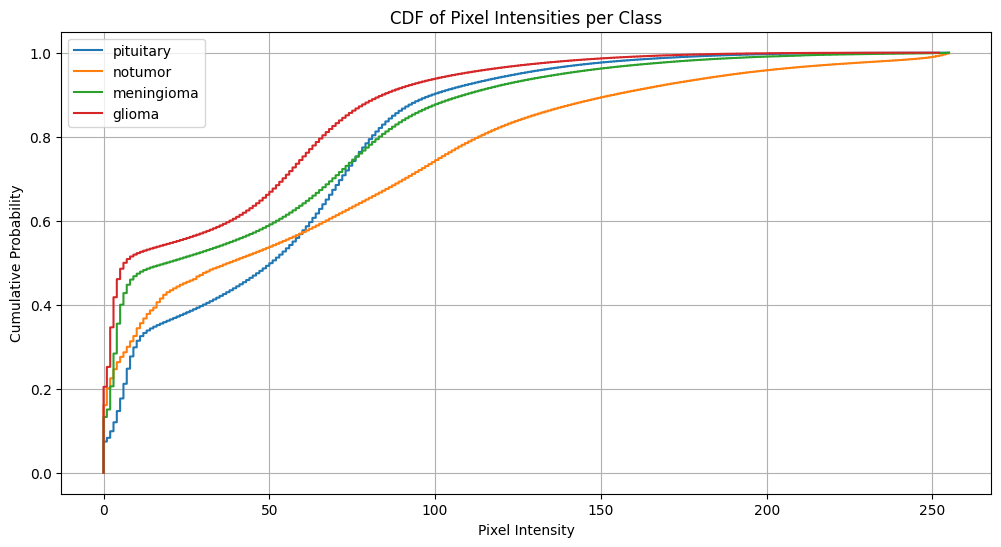

In [7]:

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the path to the dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Initialize dictionary to hold pixel values per class
class_pixel_values = {}

# Read pixel values class-wise
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_list = []
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    pixel_list.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_list)

# Plot colors
colors = sns.color_palette("tab10", len(class_pixel_values))

# Convert to DataFrame for seaborn boxplot & violin
data, labels = [], []
for cls, pixels in class_pixel_values.items():
    data.extend(pixels)
    labels.extend([cls] * len(pixels))

df = pd.DataFrame({'Pixel Intensity': data, 'Class': labels})

# 1. Histogram
plt.figure(figsize=(12, 8))
for i, (cls, pixels) in enumerate(class_pixel_values.items()):
    plt.hist(pixels, bins=50, alpha=0.6, label=cls, color=colors[i], density=True)
plt.title('Histogram of Pixel Intensities per Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Pixel Intensity', data=df, palette='Set2')
plt.title('Boxplot of Pixel Intensities by Class')
plt.grid(True)
plt.show()

# 3. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Pixel Intensity', data=df, palette='Set3', cut=0)
plt.title('Violin Plot of Pixel Intensities by Class')
plt.grid(True)
plt.show()

# 4. CDF
plt.figure(figsize=(12, 6))
for i, (cls, pixels) in enumerate(class_pixel_values.items()):
    sorted_vals = np.sort(pixels)
    cdf = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    plt.plot(sorted_vals, cdf, label=cls, color=colors[i])
plt.title('CDF of Pixel Intensities per Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


2025-04-30 07:33:30.170283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745998410.430769      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745998410.503428      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 07:33:49.362402: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


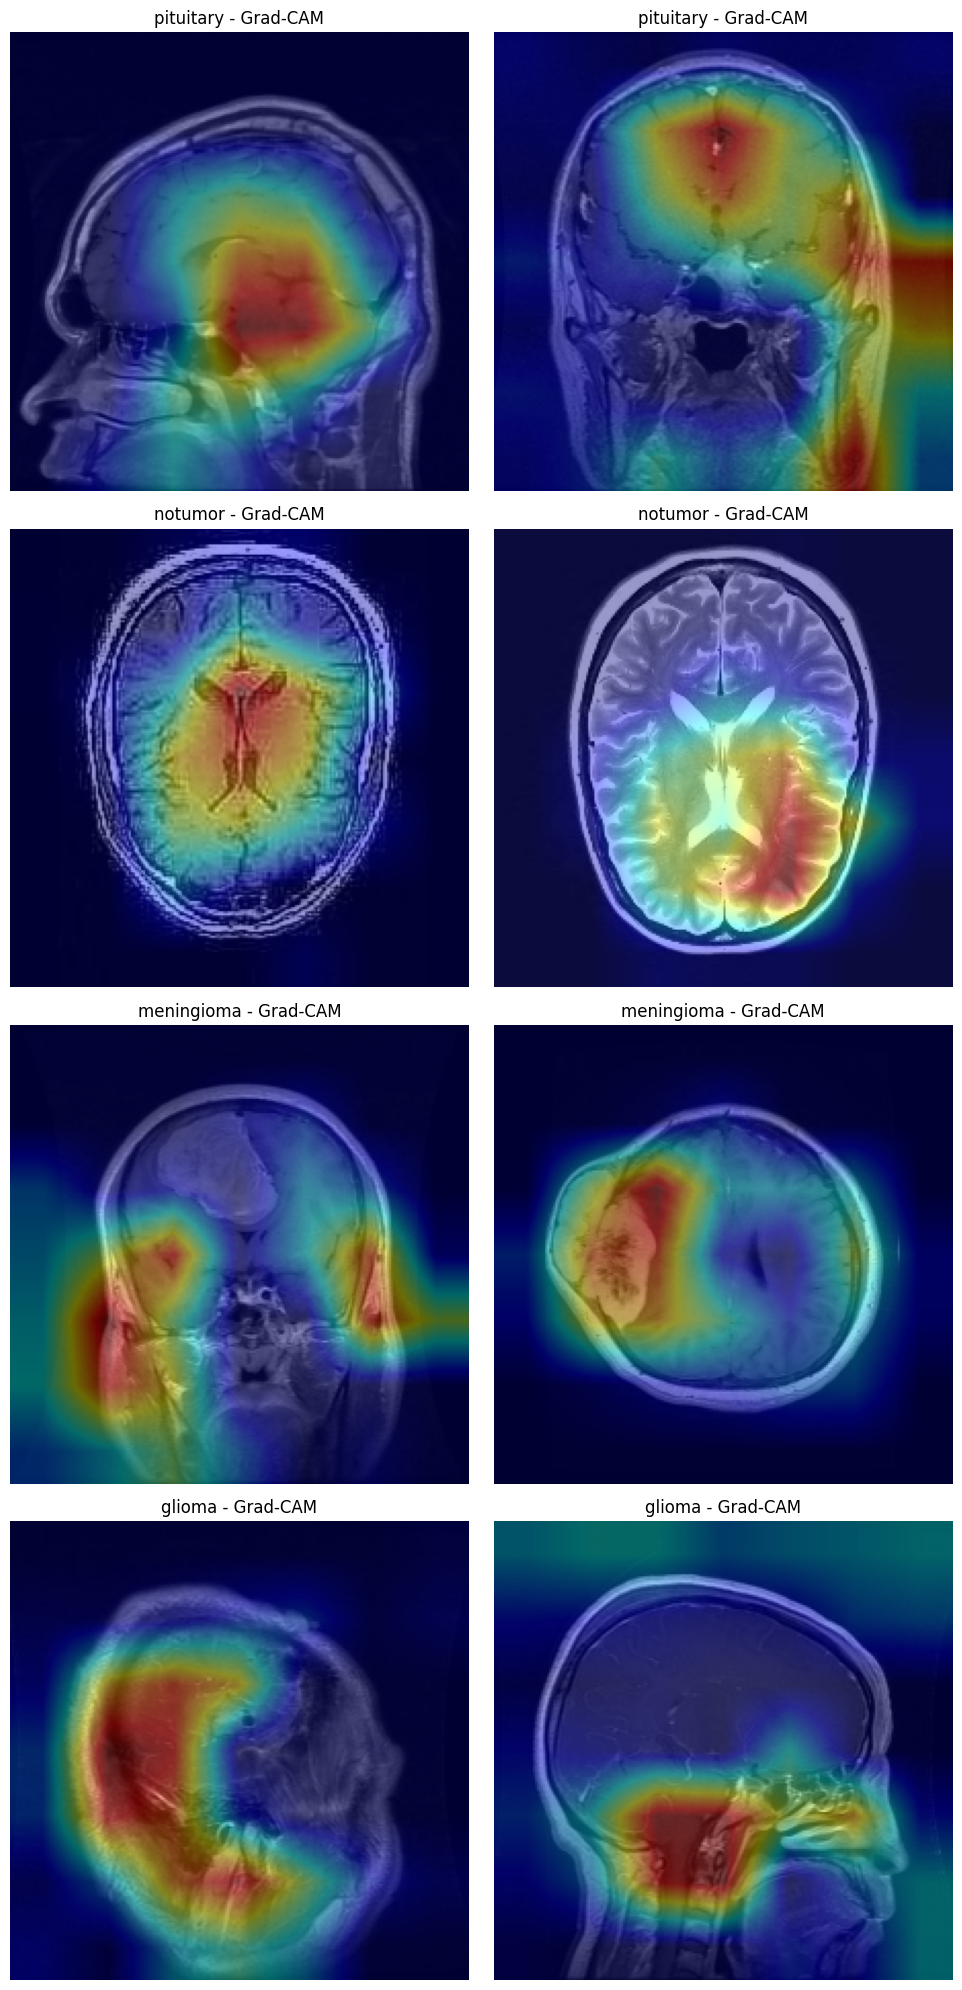

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tqdm import tqdm

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'
classes = os.listdir(data_path)

# Load pretrained ResNet50 model
model = ResNet50(weights='imagenet')  # or load_model('/path/to/your_model.h5')

# Last conv layer in ResNet50
last_conv_layer_name = "conv5_block3_out"

# Function to compute Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Visualization function
def display_gradcam(img_path, model, last_conv_layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Load original image
    original = cv2.imread(img_path)
    original = cv2.resize(original, (224, 224))

    # Apply heatmap
    heatmap = cv2.resize(heatmap, (original.shape[1], original.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on original
    superimposed_img = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

    return original, heatmap_color, superimposed_img

# Display Grad-CAM for a few samples
sample_count = 2
fig, axs = plt.subplots(len(classes), sample_count, figsize=(sample_count * 5, len(classes) * 5))

for row, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    images = os.listdir(class_path)[:sample_count]
    
    for col, img_file in enumerate(images):
        img_path = os.path.join(class_path, img_file)
        orig, heatmap, gradcam = display_gradcam(img_path, model, last_conv_layer_name)
        
        axs[row, col].imshow(cv2.cvtColor(gradcam, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f"{cls} - Grad-CAM")

plt.tight_layout()
plt.show()
